In [250]:
import csv
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [204]:
data = pd.read_csv('DelayedFlights.csv')
x = np.random.randint(data.shape[0], size = 200)
data_train = pd.DataFrame(data.iloc[x,:])

In [205]:
data_train.drop({'Year','DayofMonth','FlightNum','TailNum','TaxiIn','TaxiOut'},1, inplace = True)

In [206]:
data_train.drop(data_train.columns[0], axis = 1,inplace = True)

In [207]:
data_train.drop({'DepTime','ArrTime','ActualElapsedTime','CRSElapsedTime','Diverted'}, axis = 1,inplace = True)
data_train = data_train.reset_index()
print data_train.columns.values

['index' 'Month' 'DayOfWeek' 'CRSDepTime' 'CRSArrTime' 'UniqueCarrier'
 'AirTime' 'ArrDelay' 'DepDelay' 'Origin' 'Dest' 'Distance' 'Cancelled'
 'CancellationCode' 'CarrierDelay' 'WeatherDelay' 'NASDelay'
 'SecurityDelay' 'LateAircraftDelay']


In [243]:
k = 3
data_k_means = pd.DataFrame(data_train.iloc[:,[2,3,9]])
data_k_means_target = pd.DataFrame(data_train.iloc[:,8])
data_k_means['CRSDepTime'] = data_k_means['CRSDepTime'] // 100.
data_k_means['CRSDepTime'] = (data_k_means['CRSDepTime'] % 24.).astype(int)
print data_k_means.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
DayOfWeek     200 non-null int64
CRSDepTime    200 non-null int64
Origin        200 non-null object
dtypes: int64(2), object(1)
memory usage: 4.8+ KB
None


In [244]:
labelEncoder = LabelEncoder()
labelEncoder.fit(data_k_means['Origin'])
data_k_means['Origin'] = labelEncoder.transform(data_k_means['Origin'])
print data_k_means.head()

   DayOfWeek  CRSDepTime  Origin
0          6          15      55
1          7           9      45
2          6          13      12
3          5          16      43
4          4          20      36


In [245]:
print data_k_means.head()
print data_k_means_target.head()

   DayOfWeek  CRSDepTime  Origin
0          6          15      55
1          7           9      45
2          6          13      12
3          5          16      43
4          4          20      36
   DepDelay
0      17.0
1      27.0
2      15.0
3       8.0
4     126.0


In [246]:
data_k_means_target = pd.DataFrame(data_train.iloc[:,8])
interval = float((data_k_means_target.max() - data_k_means_target.min())/k)
print interval
data_k_means_target['DepDelay'] = data_k_means_target['DepDelay'] // interval
data_k_means_target['DepDelay'] = data_k_means_target['DepDelay'].astype(int)
print data_k_means_target.describe()

122.0
         DepDelay
count  200.000000
mean     0.115000
std      0.377475
min      0.000000
25%      0.000000
50%      0.000000
75%      0.000000
max      3.000000


In [247]:
X = np.array(data_k_means).astype(float)
y = np.array(data_k_means_target)

In [248]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
kmeans = KMeans(n_clusters = k, n_init = 10, max_iter=600) 
kmeans.fit(X)
print kmeans.predict(X)

[2 2 0 2 1 2 0 1 0 0 0 1 1 1 2 0 0 0 0 2 0 1 1 0 0 1 2 1 1 2 1 0 0 0 1 0 1
 1 2 2 0 1 1 2 1 1 2 2 1 0 1 1 1 0 0 0 1 0 0 1 1 2 2 2 1 0 1 2 1 1 0 2 0 2
 2 2 1 1 0 0 2 0 2 1 0 0 1 1 1 1 1 0 2 1 2 1 1 1 1 1 0 1 0 1 1 2 1 0 0 1 2
 0 1 2 0 0 2 1 2 0 0 2 0 0 1 2 0 1 1 1 0 2 0 2 1 1 2 1 0 2 1 1 0 1 0 2 1 2
 1 1 0 1 2 2 1 0 0 1 2 2 0 0 2 2 1 1 1 1 1 0 0 0 0 2 0 0 0 0 1 0 1 0 2 0 2
 2 2 0 1 0 2 1 0 1 1 1 1 2 1 2]


0.395


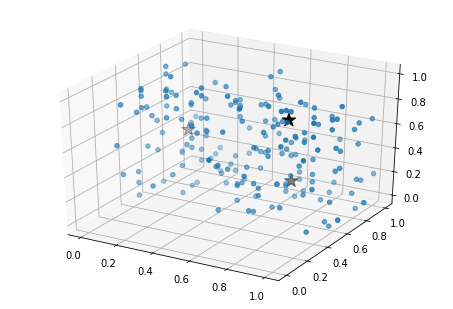

In [253]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1
print(correct/len(X))
C = kmeans.cluster_centers_
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=200)

0.185


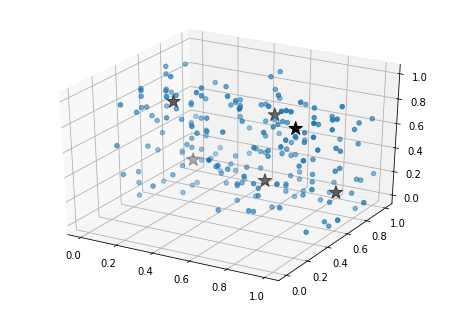

In [254]:
k = 6
data_k_means_target = pd.DataFrame(data_train.iloc[:,8])
interval = float((data_k_means_target.max() - data_k_means_target.min())/k)
data_k_means_target['DepDelay'] = data_k_means_target['DepDelay'] // interval
data_k_means_target['DepDelay'] = data_k_means_target['DepDelay'].astype(int)
y = np.array(data_k_means_target)
kmeans = KMeans(n_clusters = k, n_init = 10, max_iter=600) 
kmeans.fit(X)
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1
print(correct/len(X))
C = kmeans.cluster_centers_
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=200)